In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/hwang-gyuhan/Desktop/Collage/3-2/딥러닝응용/1주차/diabetes.csv", index_col=None)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Correlation Matrix

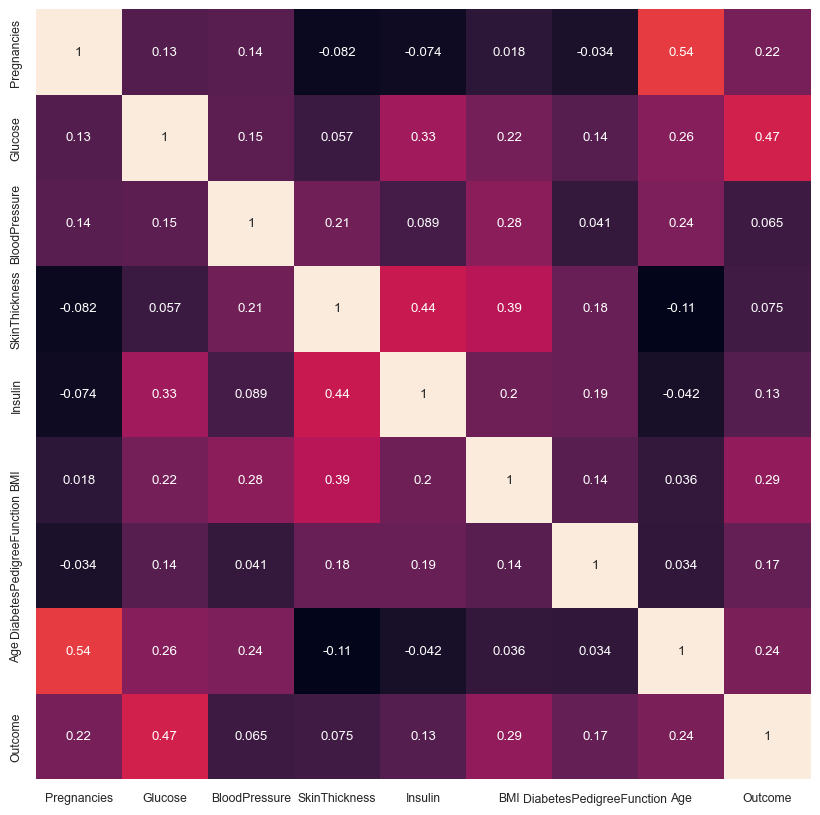

In [3]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [4]:
X = df.drop('Outcome', axis=1)
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('RMSE', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('RMSE', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('RMSE', mse(ly_preds, y_test))

RMSE 0.16392743774224447
RMSE 0.16392743774224447
RMSE 0.16392743774224453


### Display the difference between predicted and actual values as a scatter plot

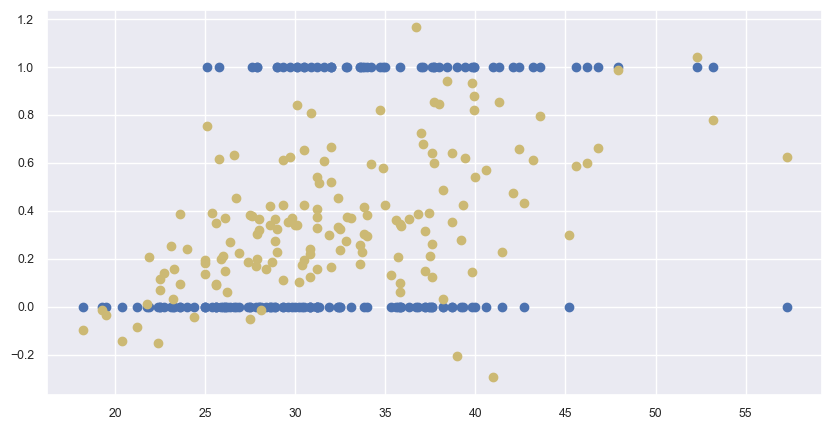

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()  

### Decision Tree Regressor

In [9]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
print('RMSE', mean_squared_error(dy_preds, y_test))

RMSE 0.21428571428571427


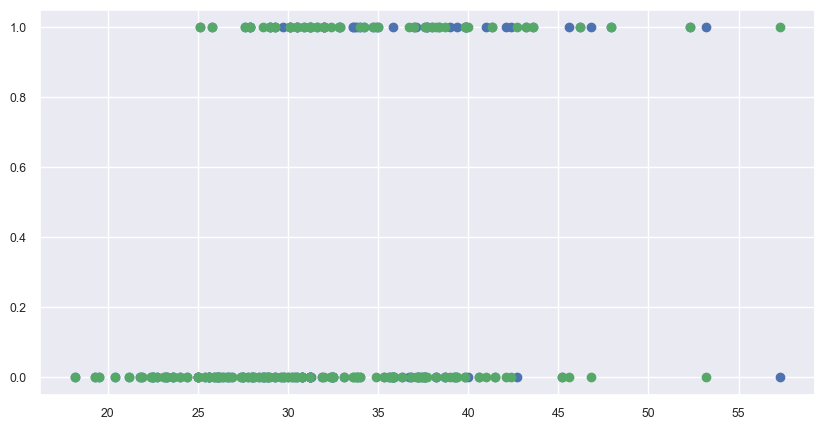

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], dy_preds, c='g', label='dy_preds')
plt.show()

### Random Forest Regressor

In [11]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
print('RMSE', mean_squared_error(ry_preds, y_test))

RMSE 0.15361168831168834


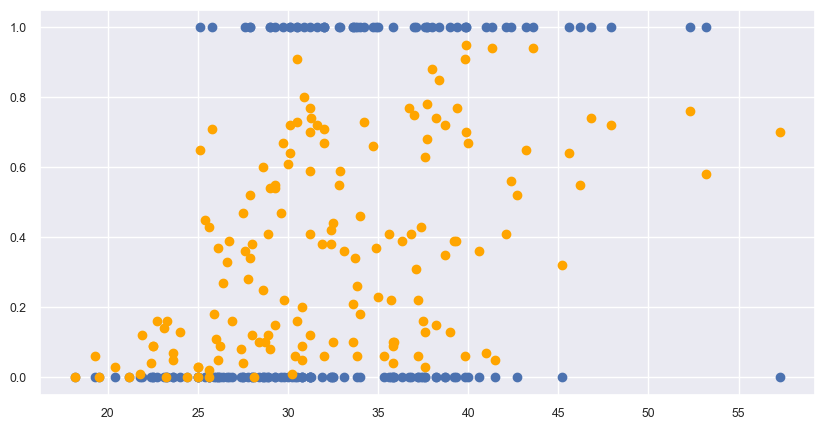

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], ry_preds, c='orange', label='ry_preds')

plt.show() 

### SVR

In [13]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.1769219282208709


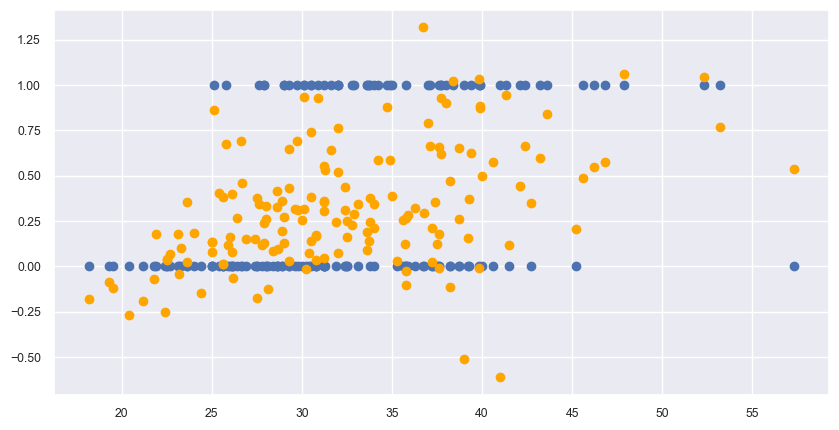

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], ry_preds, c='orange', label='ry_preds')

plt.show()   

### KNN

In [15]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
print('RMSE', mean_squared_error(dy_preds, y_test))


RMSE 0.3181818181818182


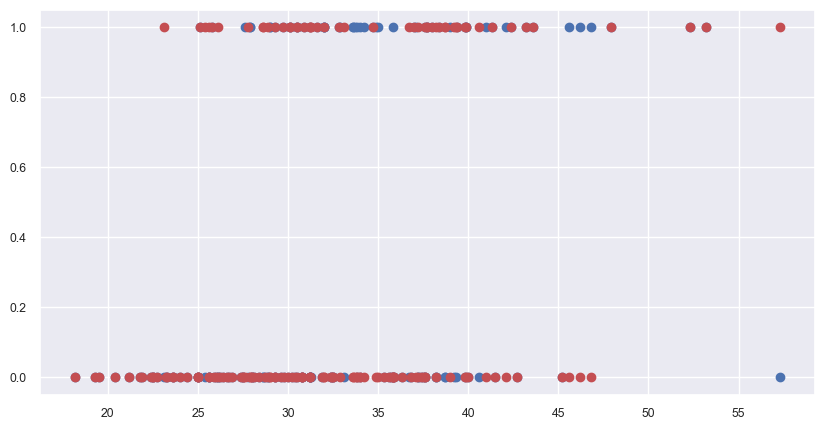

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], dy_preds, c='r', label='dy_preds')
plt.show()